![](ggjoy.png)

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/halhen/viz-pub/master/sports-time-of-day/activity.tsv", sep='\t')

In [5]:
df.describe()

,time,p
count,10656.000000,10656.000000
mean,717.500000,0.000357
std,415.709194,0.000631
min,0.000000,0.000000
25%,358.750000,0.000009
50%,717.500000,0.000085
75%,1076.250000,0.000408
max,1435.000000,0.004624


In [10]:
df.activity.unique()

array(['Running', 'Playing racquet sports',
       'Weightlifting/strength training', 'Hiking', 'Biking', 'Walking',
       'Playing sports n.e.c.*', 'Using cardiovascular equipment',
       'Participating in water sports', 'Playing basketball',
       'Working out, unspecified', 'Skiing, ice skating, snowboarding',
       'Doing yoga', 'Playing billiards', 'Fishing', 'Dancing',
       'Playing football', 'Vehicle touring/racing', 'Softball',
       'Playing soccer', 'Doing aerobics', 'Hunting',
       'Participating in martial arts', 'Bowling', 'Rollerblading',
       'Golfing', 'Participating in equestrian sports', 'Doing gymnastics',
       'Playing volleyball', 'Playing hockey', 'Boating',
       'Playing baseball', 'Playing rugby',
       'Participating in rodeo competitions', 'Wrestling',
       'Climbing, spelunking, caving', 'Fencing'], dtype=object)

In [13]:
df = df[~df.activity.isin(['Playing sports n.e.c.*'])]

In [16]:
len(df.activity.unique())

36

In [39]:
# Consider activities with max(p)>0.003
max_p_per_activity = pd.pivot_table(df, index='activity', values='p', aggfunc='max')
max_p_per_activity.head()

,p
activity,
Biking,0.000830
Boating,0.000674
Bowling,0.001233
"Climbing, spelunking, caving",0.000078
Dancing,0.000745


In [63]:
max_p_per_activity['p'].max()

0.004623535567951957

In [42]:
activities_consider = max_p_per_activity.query('p > 0.0003').index
activities_consider, len(activities_consider)

(Index([u'Biking', u'Boating', u'Bowling', u'Dancing', u'Doing aerobics',
        u'Doing yoga', u'Fishing', u'Golfing', u'Hiking', u'Hunting',
        u'Participating in martial arts', u'Participating in water sports',
        u'Playing baseball', u'Playing basketball', u'Playing billiards',
        u'Playing football', u'Playing racquet sports', u'Playing soccer',
        u'Playing volleyball', u'Rollerblading', u'Running',
        u'Skiing, ice skating, snowboarding', u'Softball',
        u'Using cardiovascular equipment', u'Vehicle touring/racing',
        u'Walking', u'Weightlifting/strength training',
        u'Working out, unspecified'],
       dtype='object', name=u'activity'), 28)

In [43]:
df = df[df.activity.isin(activities_consider)]

In [60]:
SPINE_COLOR = 'grey'
def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

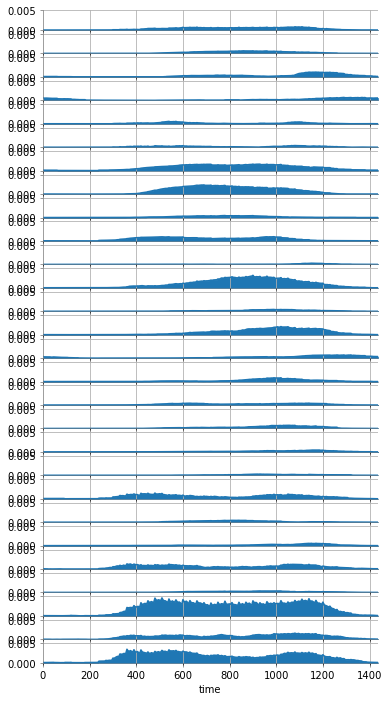

In [64]:
activities_gb = df.groupby('activity')
fig, ax = plt.subplots(nrows=len(activities_gb), sharex=True, figsize=(6, 12))
for i, (name, group) in enumerate(df.groupby('activity')):
    e = group
    e.index = e.time
    e['p'].plot(kind='area', ax=ax[i])
    format_axes(ax[i])
    ax[i].set_ylim(0, 0.005)
    ax[i].grid(True)
    

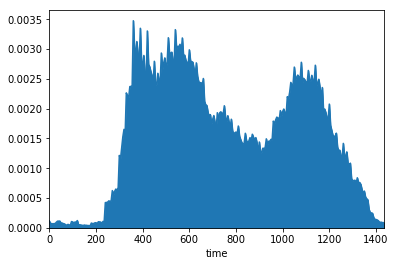

In [ ]:
from 